In [1]:
%cd ../src/

/mnt/c/Users/Jacob/Desktop/prosjektoppgave/tcav_atari/src


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from concepts import concept_instances
from utils import load_data

In [3]:
data = load_data()
for concept in concept_instances.values():
    concept.prepare_data(data)

Concept: random (b), dataset size: 7532
Concept: all lives (b), dataset size: 3236
Concept: last life (b), dataset size: 2566
Concept: reward (b), dataset size: 1350
Concept: ball collision (b), dataset size: 6024
Concept: ball low (b), dataset size: 5892
Concept: ball left paddle (b), dataset size: 6138
Concept: ball right paddle (b), dataset size: 5952
Concept: ball same x paddle (b), dataset size: 3620


/tmp/ipykernel_957/4085398577.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


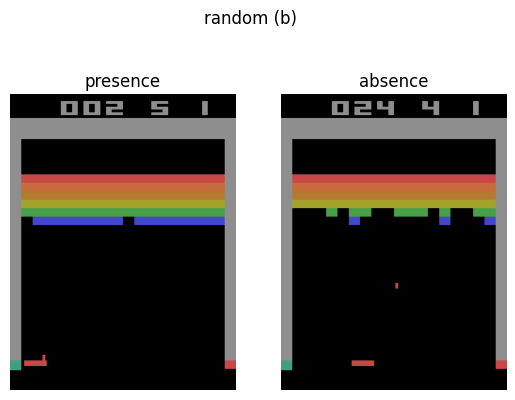

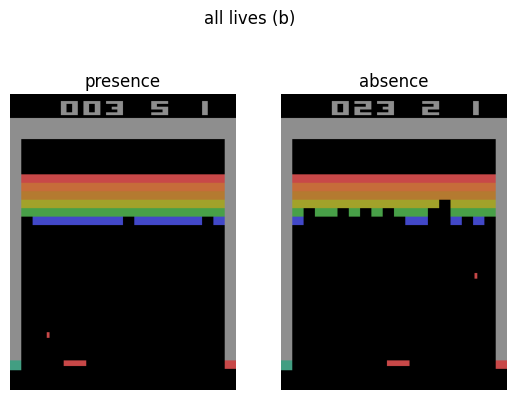

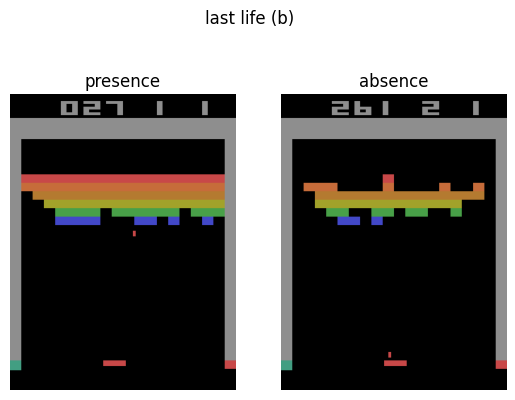

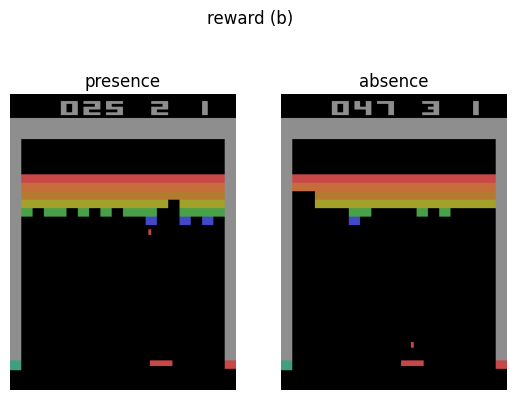

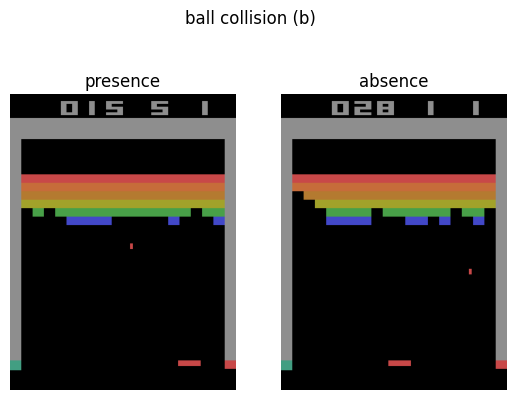

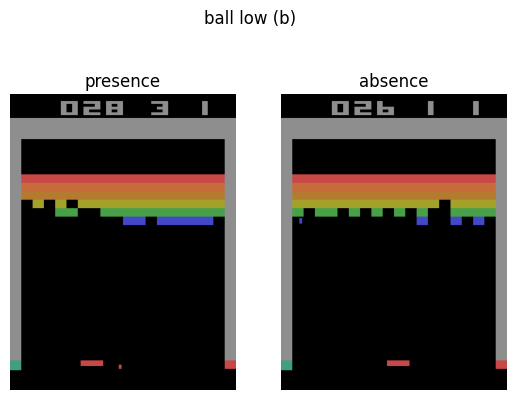

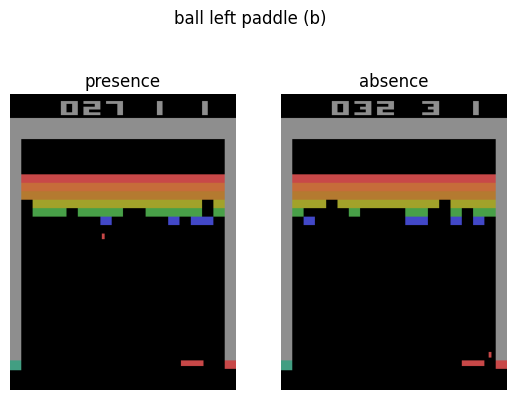

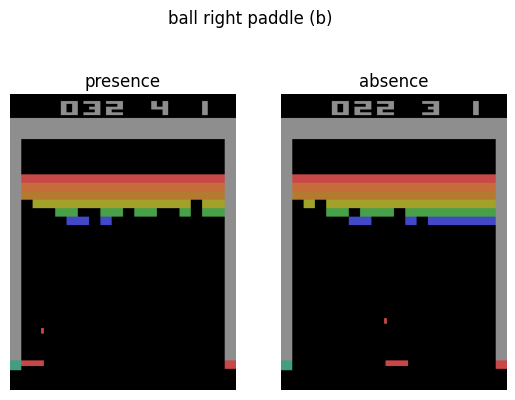

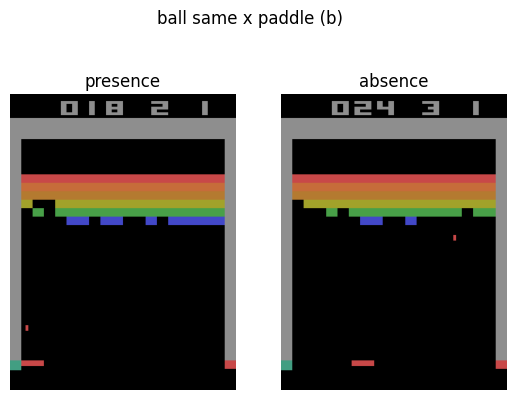

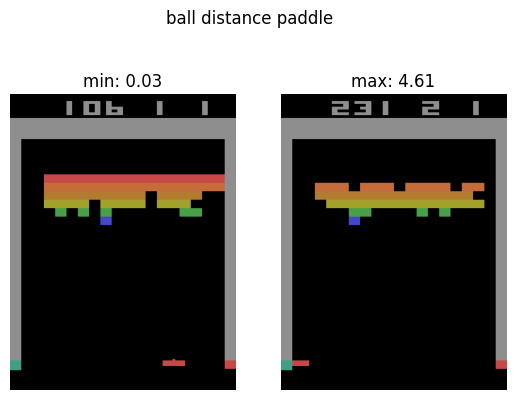

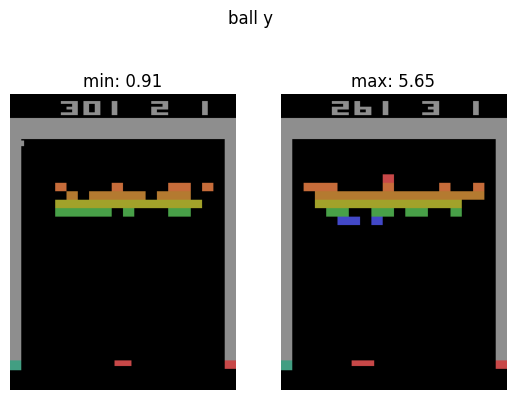

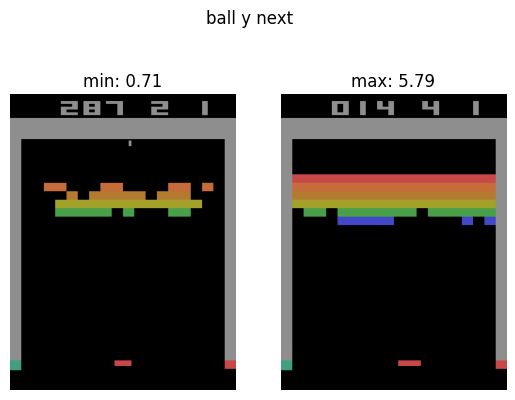

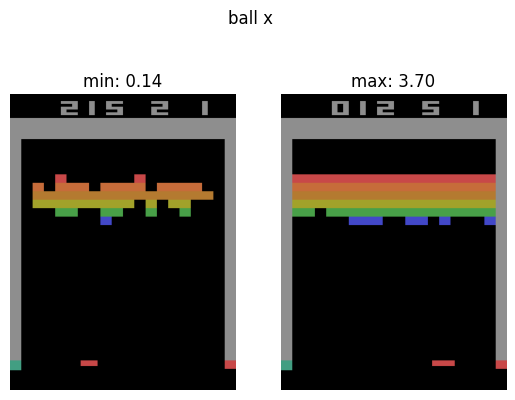

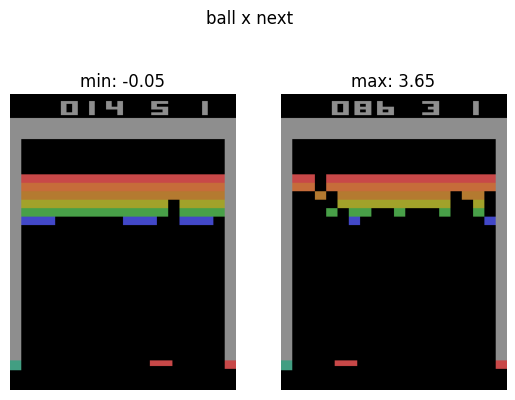

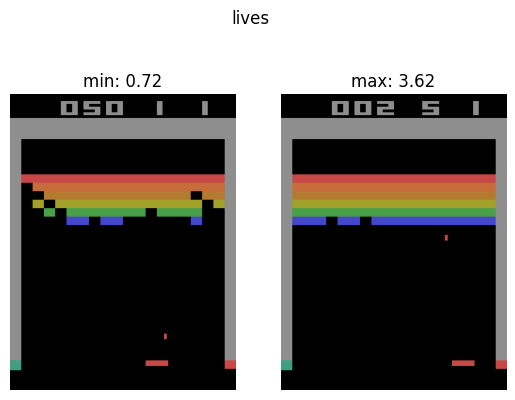

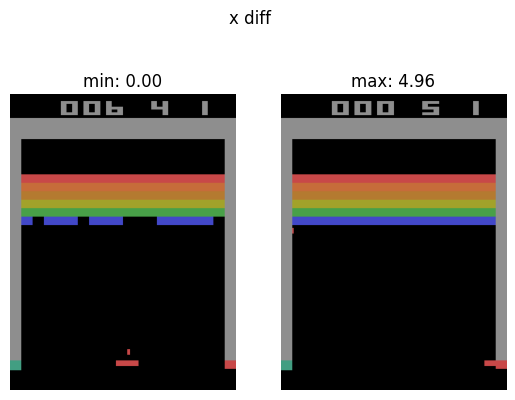

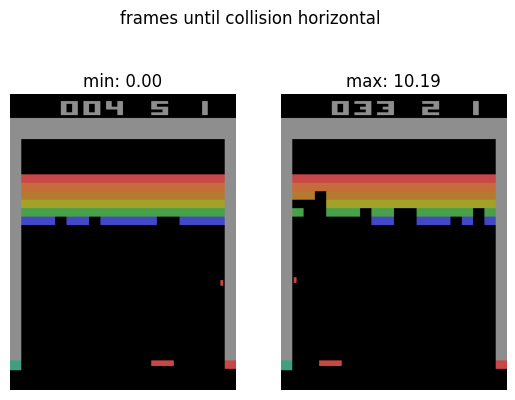

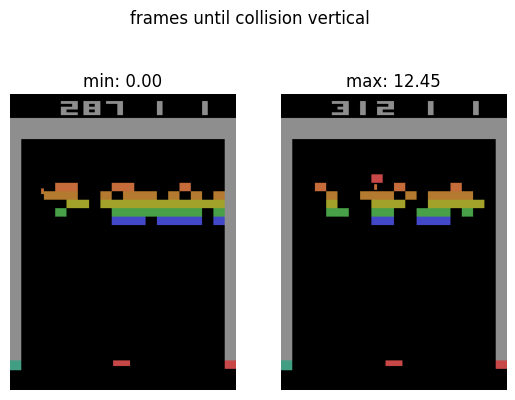

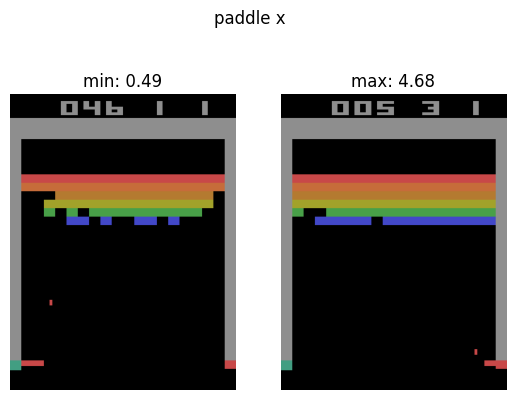

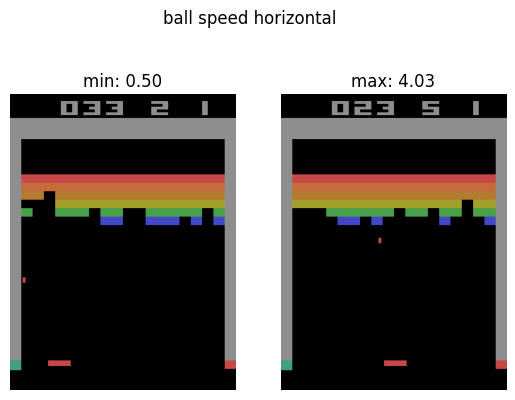

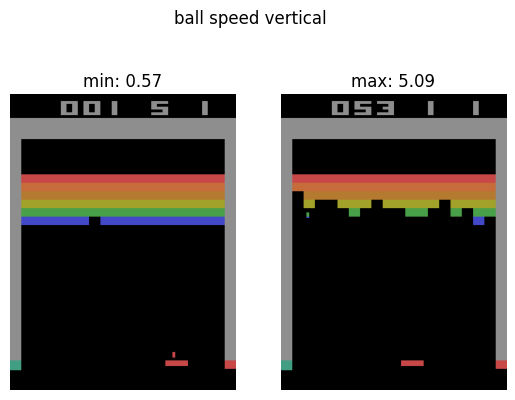

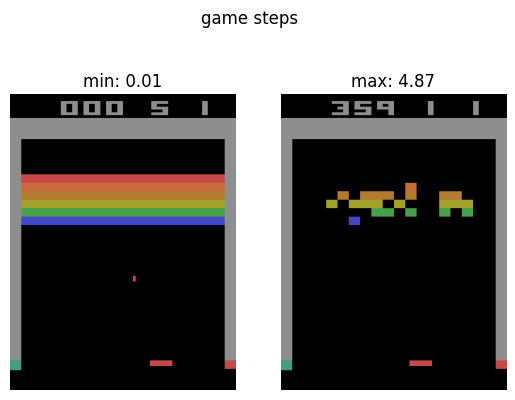

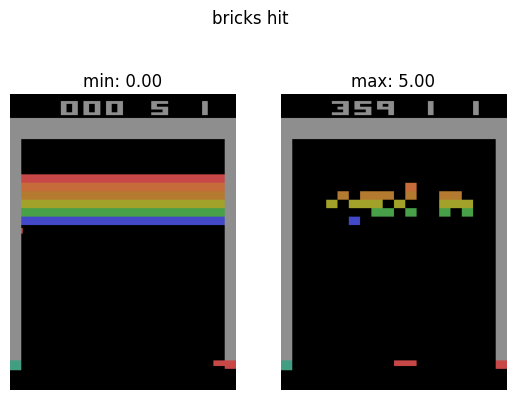

: 

In [4]:
# for each concept show: 
# presence and absence (binary)
# or minimum and maximum value (non-binary)
for concept_name, concept in concept_instances.items():
    if concept.binary:
        presence_index = np.where(concept.train_values == 1)[0]
        absence_index = np.where(concept.train_values == 0)[0]
        presence_images = concept.train_images[presence_index]
        absence_images = concept.train_images[absence_index]
        fig, ax = plt.subplots(1, 2)
        fig.suptitle(concept_name)
        ax[0].axis('off')
        ax[1].axis('off')
        ax[0].imshow(presence_images[0])
        ax[1].imshow(absence_images[0])
        ax[0].set_title('presence')
        ax[1].set_title('absence')
    else:
        min_index = np.argmin(concept.train_values)
        max_index = np.argmax(concept.train_values)
        min_image = concept.train_images[min_index]
        max_image = concept.train_images[max_index]
        fig, ax = plt.subplots(1, 2)
        fig.suptitle(concept_name)
        ax[0].axis('off')
        ax[1].axis('off')
        ax[0].imshow(min_image)
        ax[1].imshow(max_image)
        ax[0].set_title(f'min: {concept.train_values[min_index]:.2f}')
        ax[1].set_title(f'max: {concept.train_values[max_index]:.2f}')